In [11]:
import re
import pandas as pd

from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings("ignore")

In [12]:
# !wget https://raw.githubusercontent.com/maryszmary/netology_nlp_2021/master/sem1/tweets_sentiment.csv

In [13]:
df = pd.read_csv("tweets_sentiment.csv")
df.head()

,text,label
0,мыс на меня обиделась:(\nя ей даже ничего не с...,negative
1,"аааааааааааааааааааа,не хочу на работу :(",negative
2,"У меня какой-то особенный вид ушей! :D, некото...",positive
3,@simonovkon он неплохой человек в жизни. Я ра...,negative
4,"RT @Darina_Lo: Домааааа\nЕхали на такси, пели ...",positive


In [14]:
df.shape

(226834, 2)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df["text"],
    df["label"],
    test_size=0.2,
    random_state=0
    )

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [17]:
vec = CountVectorizer(ngram_range=(3, 3), max_features=30_000)
bow = vec.fit_transform(X_train)

In [18]:
list(vec.vocabulary_.items())[:20]

[('этот неловкий момент', np.int64(29907)),
 ('момент http co', np.int64(13897)),
 ('наконец то можно', np.int64(15527)),
 ('узнать что же', np.int64(26600)),
 ('живу ним одним', np.int64(7478)),
 ('ним одним ночами', np.int64(17468)),
 ('одним ночами плачу', np.int64(18590)),
 ('ночами плачу на', np.int64(18066)),
 ('плачу на любой', np.int64(19412)),
 ('на любой поступок', np.int64(14555)),
 ('любой поступок пойду', np.int64(11855)),
 ('поступок пойду ради', np.int64(20079)),
 ('пойду ради него', np.int64(19745)),
 ('ради него он', np.int64(20832)),
 ('него он меня', np.int64(17063)),
 ('он меня ненавидет', np.int64(18679)),
 ('желания 11 12', np.int64(7445)),
 ('11 12 13', np.int64(28)),
 ('12 13 14', np.int64(38)),
 ('13 14 15', np.int64(56))]

In [19]:
model = LogisticRegression(random_state=42, solver="liblinear")
model.fit(bow, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [20]:
y_pred = model.predict(vec.transform(X_test))
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

    negative       0.30      0.73      0.42      9172
    positive       0.89      0.57      0.69     36195

    accuracy                           0.60     45367
   macro avg       0.60      0.65      0.56     45367
weighted avg       0.77      0.60      0.64     45367



In [21]:
micro_vec = CountVectorizer()

In [22]:
corpus = [
    "в москве сегодня снег",
    "в москве холодно и сыро",
    "снег это хорошо но холодно"
]

In [23]:
micro_vec.fit(corpus)
micro_vec.vocabulary_

{'москве': 0,
 'сегодня': 2,
 'снег': 3,
 'холодно': 5,
 'сыро': 4,
 'это': 7,
 'хорошо': 6,
 'но': 1}

In [24]:
matrix = micro_vec.transform(corpus).todense()
matrix

matrix([[1, 0, 1, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 0, 0],
        [0, 1, 0, 1, 0, 1, 1, 1]])

In [25]:
micro_df = pd.DataFrame(
    data=micro_vec.transform(corpus).todense(),
    columns=micro_vec.vocabulary_.keys()
)
micro_df.head()

,москве,сегодня,снег,холодно,сыро,это,хорошо,но
0,1,0,1,1,0,0,0,0
1,1,0,0,0,1,1,0,0
2,0,1,0,1,0,1,1,1


In [26]:
vec = TfidfVectorizer()
bow = vec.fit_transform(X_train)

In [27]:
model = LogisticRegression(random_state=42)
model.fit(bow, y_train)

LogisticRegression(random_state=42)

In [28]:
y_pred = model.predict(vec.transform(X_test))
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

    negative       0.74      0.76      0.75     21511
    positive       0.78      0.75      0.77     23856

    accuracy                           0.76     45367
   macro avg       0.76      0.76      0.76     45367
weighted avg       0.76      0.76      0.76     45367



In [29]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
corpus = [token for tweet in df["text"] for token in word_tokenize(tweet) if token not in punctuation]

# Закон Ципфа

In [31]:
from collections import Counter

frequency_dict = Counter(corpus)
frequency_dict.most_common(20)

[('не', 69472),
 ('и', 55166),
 ('в', 52902),
 ('я', 52818),
 ('RT', 38070),
 ('на', 35759),
 ('http', 32998),
 ('что', 31541),
 ('с', 27217),
 ('а', 26860),
 ('...', 22363),
 ('меня', 20656),
 ('у', 18928),
 ('как', 18280),
 ('так', 16839),
 ('D', 16575),
 ('это', 16542),
 ('мне', 16337),
 ('все', 14763),
 ('ты', 13412)]

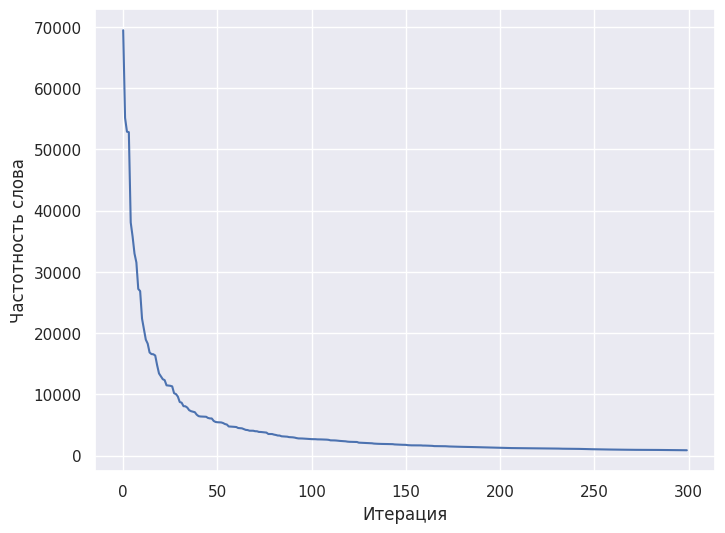

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
plt.figure(figsize=(8, 6))
freqs = list(frequency_dict.values())
freqs = sorted(freqs, reverse=True)
plt.plot([i for i in range(300)], freqs[:300])
plt.xlabel("Итерация")
plt.ylabel("Частотность слова")
plt.show()

In [33]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/egor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
noise = stopwords.words("russian") + list(punctuation)

In [1]:
from pymorphy3 import MorphAnalyzer
morph = MorphAnalyzer()

def lemmatize_preprocessor(sentence, model=morph):
    tokens = word_tokenize(sentence)
    for i, token in enumerate(tokens):
        tokens[i] = model.parse(token)[0].normal_form
    return tokens


'цветок'

In [47]:
lemmatize_preprocessor("в москве красивые дома но очень холодный снег")

['в', 'москва', 'красивый', 'дом', 'но', 'очень', 'холодный', 'снег']

In [48]:
vec = CountVectorizer(ngram_range=(1, 1), stop_words=noise, tokenizer=lemmatize_preprocessor, max_df=0.2, min_df=1, lowercase=True)
vec.fit(X_train)
bow = vec.transform(X_train)
model = LogisticRegression(random_state=42)
model.fit(bow, y_train)
predict = model.predict(vec.transform(X_test))
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

    negative       0.80      0.76      0.78     23661
    positive       0.75      0.80      0.77     21706

    accuracy                           0.78     45367
   macro avg       0.78      0.78      0.78     45367
weighted avg       0.78      0.78      0.78     45367



In [51]:
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, lowercase=True)
vec.fit(X_train)
bow = vec.transform(X_train)
model = LogisticRegression(random_state=42)
model.fit(bow, y_train)
predict = model.predict(vec.transform(X_test))
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     22285
    positive       1.00      1.00      1.00     23082

    accuracy                           1.00     45367
   macro avg       1.00      1.00      1.00     45367
weighted avg       1.00      1.00      1.00     45367

